In [1]:
# Creating connection to data base
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

conn = sqlite3.connect('/Users/Marcy_Student/Mod3_Project/data/themepark.db')
cursor = conn.cursor()

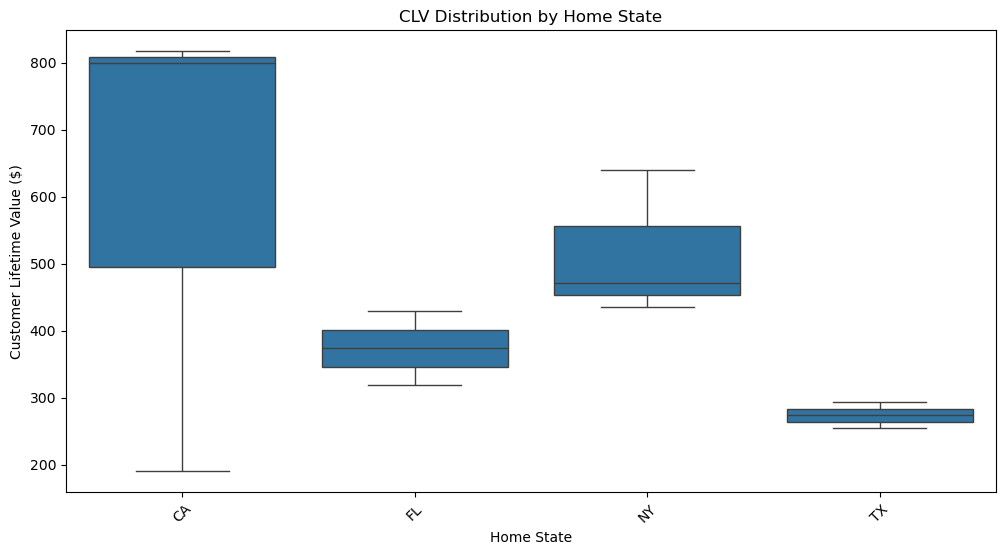

In [4]:
# Query CLV distribution by home state
query = """
SELECT 
    dg.home_state,
    SUM(fv.spend_dollars) AS total_clv
FROM fact_visits fv
LEFT JOIN dim_guest dg ON fv.guest_id = dg.guest_id
WHERE fv.spend_dollars IS NOT NULL
GROUP BY dg.home_state, fv.guest_id;
"""

df = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='home_state', y='total_clv', data=df)
plt.title("CLV Distribution by Home State")
plt.xlabel("Home State")
plt.ylabel("Customer Lifetime Value ($)")
plt.xticks(rotation=45)
plt.show()
plt.savefig("../figures/clv_by_state.png",bbox_inches="tight")
plt.close()


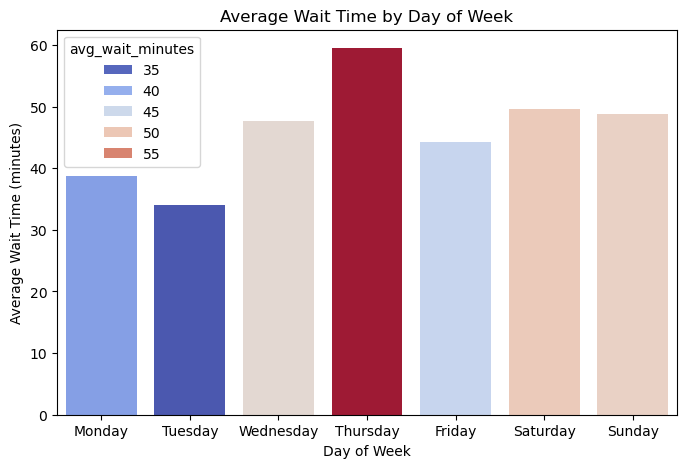

In [5]:
#Query average wait time by day of week
query_wait_by_day = """
SELECT 
    d.day_name,
    ROUND(AVG(fre.wait_minutes), 1) AS avg_wait_minutes
FROM fact_ride_events fre
JOIN fact_visits fv ON fre.visit_id = fv.visit_id
JOIN dim_date d ON fv.date_id = d.date_id
WHERE fre.wait_minutes IS NOT NULL
GROUP BY d.day_name
"""

df_wait_by_day = pd.read_sql_query(query_wait_by_day, conn)

# Define correct order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_wait_by_day['day_name'] = pd.Categorical(df_wait_by_day['day_name'], categories=weekday_order, ordered=True)
df_wait_by_day = df_wait_by_day.sort_values('day_name')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='day_name', y='avg_wait_minutes', data=df_wait_by_day, palette='coolwarm',hue = 'avg_wait_minutes')
plt.title("Average Wait Time by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Wait Time (minutes)")
plt.show()
plt.savefig("../figures/avg_wait_by_dow.png", bbox_inches="tight")
plt.close()


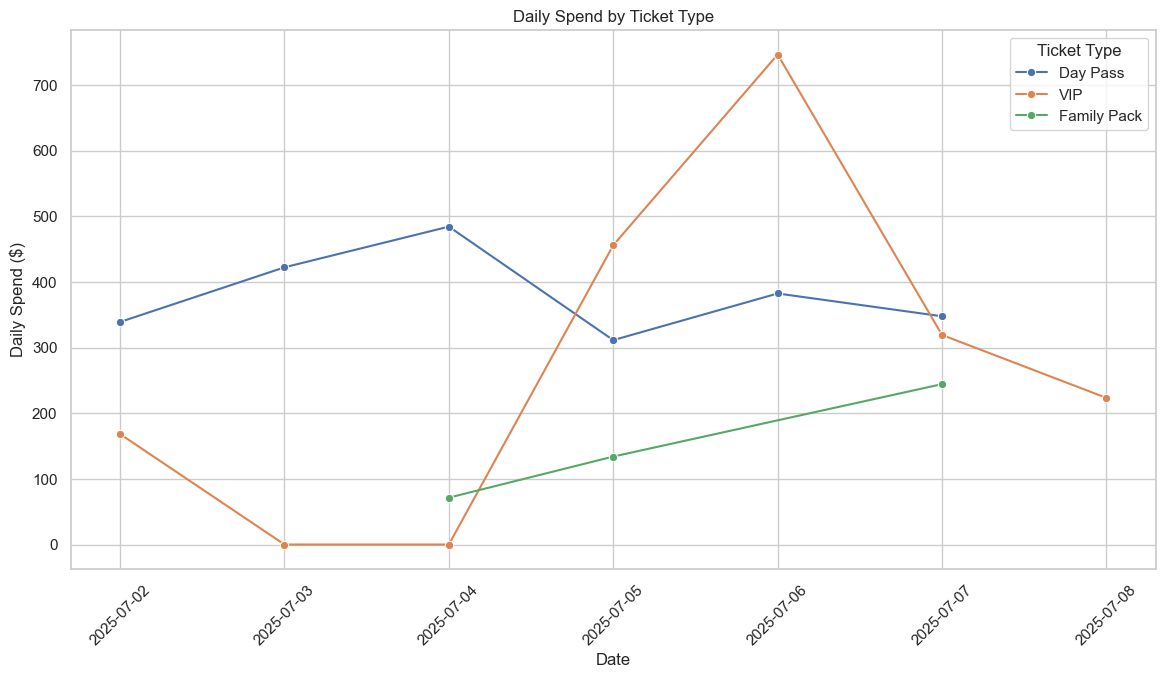

In [6]:
# Query daily spend by ticket type
query = """
SELECT
    d.date_iso,
    t.ticket_type_name,
    SUM(v.spend_dollars) AS daily_spend
FROM fact_visits v
LEFT JOIN dim_date d ON v.date_id = d.date_id
LEFT JOIN dim_ticket t ON v.ticket_type_id = t.ticket_type_id
GROUP BY d.date_iso, t.ticket_type_name
ORDER BY d.date_iso, t.ticket_type_name
"""

df = pd.read_sql_query(query, conn)
df['date_iso'] = pd.to_datetime(df['date_iso'])

# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(14,7))

# Plot daily spend by ticket type (solid lines with markers)
sns.lineplot(
    data=df,
    x='date_iso',
    y='daily_spend',
    hue='ticket_type_name',
    marker='o',
    linestyle='-'
)

plt.title('Daily Spend by Ticket Type')
plt.xlabel('Date')
plt.ylabel('Daily Spend ($)')
plt.legend(title='Ticket Type')
plt.xticks(rotation=45)
plt.show()
plt.savefig("../figures/daily_spend_by_ticket_type.png", bbox_inches="tight")
plt.close()
